# Connect to drive, load data and requirements

Install requirements (restart your runtime after installation)

In [ ]:
 !pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 15.2 MB/s 
     |████████████████████████████████| 9.2 MB 60.3 MB/s 
     |████████████████████████████████| 5.3 MB 57.9 MB/s 
     |████████████████████████████████| 7.6 MB 55.2 MB/s 
     |████████████████████████████████| 1.9 MB 57.7 MB/s 
     |████████████████████████████████| 441 kB 64.5 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 1.3 MB 55.5 MB/s 
     |████████████████████████████████| 163 kB 35.5 MB/s 
     |████████████████████████████████| 182 kB 67.4 MB/s 
     |████████████████████████████████| 166 kB 63.0 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 166 kB 67.8 MB/s 
     |████████████████████████████████| 162 kB 66.8 MB/s 
     |████████████████████████████████| 162 kB 67.1 MB/s 
     |█████████████████████████████

Mount google drive with data


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/SM_Assignment3

/content/drive/MyDrive/Colab Notebooks/SM_Assignment3


Load requirements

In [ ]:
import pandas as pd
import numpy as np
from simpletransformers.classification import ClassificationModel
from transformers import AutoTokenizer, AutoModelForMaskedLM
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import torch
import seaborn as sns
import matplotlib.pyplot as plt


Load OLID data

In [ ]:
data_dir = 'data/'
olid_train = pd.read_csv(data_dir + 'olid-train-small.csv', sep=',')
olid_test = pd.read_csv(data_dir + 'olid-test.csv', sep=',')
olid_train.head(5)
olid_test.head(5)

,id,text,labels
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1
1,27014,"#ConstitutionDay is revered by Conservatives, ...",0
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0
3,13876,#Watching #Boomer getting the news that she is...,0
4,60133,#NoPasaran: Unity demo to oppose the far-right...,1


Load Hasoc data

In [ ]:
hasoc_train = pd.read_csv(data_dir + 'hasoc-train.csv', sep=',')
hasoc_train.head(5)

,id,text,labels
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,0
1,hasoc_en_2,@politico No. We should remember very clearly ...,1
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,0
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,0
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,0


In [ ]:
def makeConfusionMatrix(name, cm):
  ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar = False, fmt='g' , annot_kws={"fontsize":16})
  

  ax.set_title(f'Confusion Matrix of {name}\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  
  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['0','1'])
  ax.yaxis.set_ticklabels(['0','1'])
  plt.savefig(f"ConfusionMatrix{name}.png", bbox_inches = 'tight') 

  ## Display the visualization of the Confusion Matrix.
  plt.show()

# create and train BERT models


Load pre-trained models
List of models [here](https://huggingface.co/models)

In [ ]:
# make models
model_args = {}
model_args["save_steps"] = -1
model_args["save_model_every_epoch"] = False
# pre-trained on english
model_BERT = ClassificationModel('bert', 'bert-base-cased', args = model_args)
# pre-trained on hate 
model_hateBERT = ClassificationModel('bert', 'GroNLP/hateBERT', args = model_args)
model_fBERT = ClassificationModel('bert', 'diptanu/fBERT', args = model_args)



Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at GroNLP/hateBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly

Downloading:   0%|          | 0.00/151 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at diptanu/fBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at diptanu/fBERT and are newly ini

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Training and caving in and cross models

## in domain

In [ ]:
# train models for in-domain
train_args = {'output_dir' : 'outputs_in/', 'overwrite_output_dir' : True}
model_BERT.train_model(olid_train, args = train_args )
torch.save(model_BERT, "outputs_in/model_b")
model_fBERT.train_model(olid_train, args = train_args )
torch.save(model_fBERT, "outputs_in/model_fb")
model_hateBERT.train_model(olid_train, args =  train_args )
torch.save(model_hateBERT, "outputs_in/model_hb")

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

In [ ]:
#saves models so training dus not have to be run again
torch.save(model_BERT, "outputs_in/model_BERT")
torch.save(model_fBERT, "outputs_in/model_fBERT")
torch.save(model_hateBERT, "outputs_in/model_hateBERT")

## cross-domain

In [ ]:
# make models
model_args = {}
model_args["save_steps"] = -1
model_args["save_model_every_epoch"] = False
# pre-trained on english
model_BERT_cross = ClassificationModel('bert', 'bert-base-cased', args = model_args)
# pre-trained on hate 
model_hateBERT_cross = ClassificationModel('bert', 'GroNLP/hateBERT', args = model_args)
model_fBERT_cross = ClassificationModel('bert', 'diptanu/fBERT', args = model_args)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
# train cross models
train_args_cross = {'output_dir' : 'outputs_cross/', 'overwrite_output_dir' : True}
# model_BERT_cross.train_model(hasoc_train, args = train_args_cross )
torch.save(model_BERT_cross, "outputs_cross/model_b")
model_fBERT_cross.train_model(hasoc_train, args = train_args_cross)
torch.save(model_fBERT_cross, "outputs_cross/model_fb")
model_hateBERT_cross.train_model(hasoc_train, args = train_args_cross)
torch.save(model_hateBERT_cross, "outputs_cross/model_hb")

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

  0%|          | 0/5852 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/732 [00:00<?, ?it/s]

In [ ]:
# save models so they do not have to be trained again
torch.save(model_BERT_cross, "outputs_cross/model_BERT_cross")
torch.save(model_fBERT_cross, "outputs_cross/model_fBERT_cross")
torch.save(model_hateBERT_cross, "outputs_in/model_hateBERT_cross")

# Evaluation of BERT models

 ## In - domain

Load models

In [ ]:
# load models from file
model_BERT = torch.load("outputs_in/model_BERT")
model_fBERT = torch.load("outputs_in/model_fBERT")
model_hateBERT = torch.load("outputs_in/model_hateBERT")


predictions

In [ ]:
# method for visualing and saving confusion matetrix
def makeConfusionMatrix(name, cm):
  ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar = False, fmt='g' , annot_kws={"fontsize":16})
  

  ax.set_title(f'Confusion Matrix of {name}\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  
  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['0','1'])
  ax.yaxis.set_ticklabels(['0','1'])
  plt.savefig(f"ConfusionMatrix{name}.png", bbox_inches = 'tight') 

  ## Display the visualization of the Confusion Matrix.
  plt.show()

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

BERT

[[620   0]
 [240   0]]


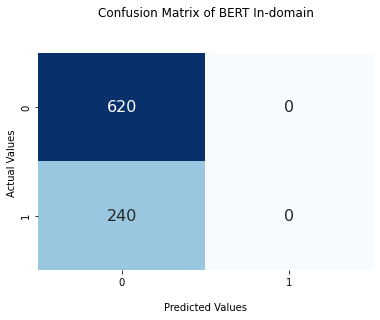



              precision    recall  f1-score   support

           0       0.72      1.00      0.84       620
           1       0.00      0.00      0.00       240

    accuracy                           0.72       860
   macro avg       0.36      0.50      0.42       860
weighted avg       0.52      0.72      0.60       860



fBERT



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


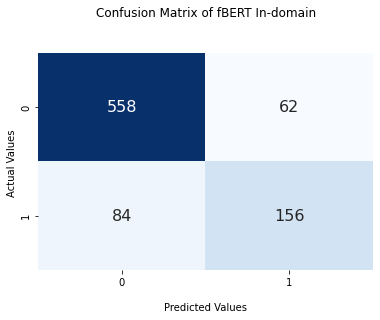



              precision    recall  f1-score   support

           0       0.87      0.90      0.88       620
           1       0.72      0.65      0.68       240

    accuracy                           0.83       860
   macro avg       0.79      0.78      0.78       860
weighted avg       0.83      0.83      0.83       860



hateBERT



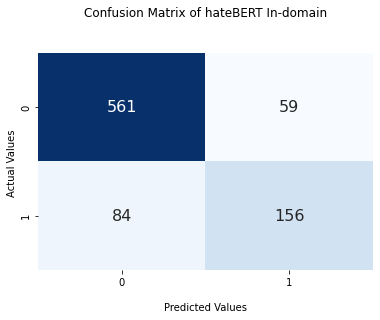



              precision    recall  f1-score   support

           0       0.87      0.90      0.89       620
           1       0.73      0.65      0.69       240

    accuracy                           0.83       860
   macro avg       0.80      0.78      0.79       860
weighted avg       0.83      0.83      0.83       860



In [ ]:
# make predictions and pring classification report and confusion matrices for in-domain
predictions_BERT, raw_outputs_BERT = model_BERT.predict(olid_test['text'].tolist())
predictions_fBERT, raw_outputs_fBERT = model_fBERT.predict(olid_test['text'].tolist())
predictions_hateBERT, raw_outputs_hateBERT = model_hateBERT.predict(olid_test['text'].tolist())

cm_BERT = confusion_matrix(olid_test['labels'], predictions_BERT)
cm_fBERT = confusion_matrix (olid_test['labels'], predictions_fBERT)
cm_hateBERT = confusion_matrix( olid_test['labels'], predictions_hateBERT)



print("BERT\n")
print(cm_BERT)
makeConfusionMatrix("BERT In-domain", cm_BERT)
print("\n")
print(classification_report(olid_test['labels'], predictions_BERT))
print("\n")
print("fBERT\n")
makeConfusionMatrix("fBERT In-domain", cm_fBERT)
print("\n")
print(classification_report( olid_test['labels'], predictions_fBERT))
print("\n")
print("hateBERT\n")
makeConfusionMatrix("hateBERT In-domain", cm_hateBERT)
print("\n")
print(classification_report(olid_test['labels'], predictions_hateBERT))

can be used for qualitative analysis

In [ ]:
#performance metrics (default of average_precision_score is 'macro' so shold give correct result) --> all saved to 'result_x
import sklearn
kwargs = {'f1' : sklearn.metrics.accuracy_score, 'precision' : sklearn.metrics.precision_score, 'recall' : sklearn.metrics.recall_score}
result_BERT, model_outputs_BERT, wrong_predictions_BERT = model_BERT.eval_model(olid_test, **kwargs)
result_fBERT, model_outputs_fBERT, wrong_predictions_fBERT = model_fBERT.eval_model(olid_test, **kwargs )
result_hateBERT, model_outputs_hateBERT, wrong_predictions_hateBERT = model_hateBERT.eval_model(olid_test, **kwargs)


  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/108 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/108 [00:00<?, ?it/s]

## Cross-domain

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

BERT

[[  0 620]
 [  0 240]]


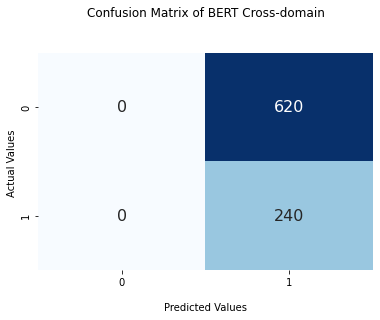



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       620
           1       0.28      1.00      0.44       240

    accuracy                           0.28       860
   macro avg       0.14      0.50      0.22       860
weighted avg       0.08      0.28      0.12       860



fBERT



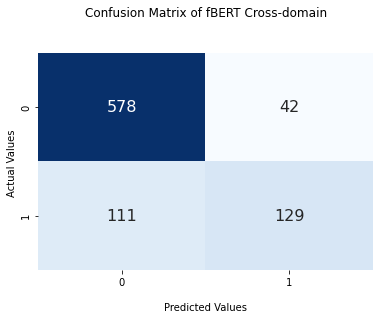



              precision    recall  f1-score   support

           0       0.84      0.93      0.88       620
           1       0.75      0.54      0.63       240

    accuracy                           0.82       860
   macro avg       0.80      0.73      0.76       860
weighted avg       0.82      0.82      0.81       860



hateBERT



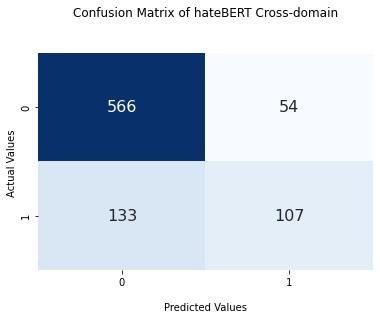



              precision    recall  f1-score   support

           0       0.81      0.91      0.86       620
           1       0.66      0.45      0.53       240

    accuracy                           0.78       860
   macro avg       0.74      0.68      0.70       860
weighted avg       0.77      0.78      0.77       860



In [ ]:
# make predictions and pring classification report and confusion matrices for cross-domain

predictions_BERT_cross, raw_outputs_BERT_cross = model_BERT_cross.predict(olid_test['text'].tolist())
predictions_fBERT_cross, raw_outputs_fBERT_cross = model_fBERT_cross.predict(olid_test['text'].tolist())
predictions_hateBERT_cross, raw_outputs_hateBERT_cross = model_hateBERT_cross.predict(olid_test['text'].tolist())

cm_BERT_cross = confusion_matrix(olid_test['labels'], predictions_BERT_cross)
cm_fBERT_cross = confusion_matrix (olid_test['labels'], predictions_fBERT_cross)
cm_hateBERT_cross = confusion_matrix( olid_test['labels'], predictions_hateBERT_cross)



print("BERT\n")
print(cm_BERT_cross)
makeConfusionMatrix("BERT Cross-domain", cm_BERT_cross)
print("\n")
print(classification_report(olid_test['labels'], predictions_BERT_cross))
print("\n")
print("fBERT\n")
makeConfusionMatrix("fBERT Cross-domain", cm_fBERT_cross)
print("\n")
print(classification_report( olid_test['labels'], predictions_fBERT_cross))
print("\n")
print("hateBERT\n")
makeConfusionMatrix("hateBERT Cross-domain", cm_hateBERT_cross)
print("\n")
print(classification_report(olid_test['labels'], predictions_hateBERT_cross))

qualitative analysis

In [ ]:
kwargs = {'f1' : sklearn.metrics.accuracy_score, 'precision' : sklearn.metrics.average_precision_score, 'recall' : sklearn.metrics.recall_score}
result_cross_BERT, model_outputs_cross_BERT, wrong_predictions_cross_BERT = model_BERT_cross.eval_model(olid_test, **kwargs)
result_cross_fBERT, model_outputs_cross_fBERT, wrong_predictions_cross_fBERT = model_fBERT_cross.eval_model(olid_test, **kwargs )
result_cross_hateBERT, model_outputs_cross_hateBERT, wrong_predictions_cross_hateBERT = model_hateBERT_cross.eval_model(olid_test, **kwargs)

print(model_outputs_cross_BERT)

  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/108 [00:00<?, ?it/s]

[[ 0.09686279  1.07324219]
 [ 0.12890625  1.02832031]
 [ 0.28149414  1.0390625 ]
 ...
 [ 0.40844727  0.95068359]
 [ 0.21813965  0.96826172]
 [-0.17419434  1.12890625]]


# Create and evaluate LSTM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
# 'reshape' data
# filtered_train = olid_train[['text','labels']].copy()
filtered_train = hasoc_train[['text','labels']].copy()
filtered_test = olid_test[['text','labels']].copy()
x_train = filtered_train['text']
y_train = filtered_train['labels']

In [ ]:
#make embedding vectors
def create_embeddings(x_train):
  max_dimension = 200
  token = Tokenizer()
  token.fit_on_texts(x_train)
  seq = token.texts_to_sequences(x_train)
  pad_seq = pad_sequences(seq,maxlen=max_dimension)
  vocab_size = len(token.word_index)+1
  embedding_vector = {}
  f = open('glove_word_embeddings/glove.twitter.27B.200d.txt')
  for line in tqdm(f):
      value = line.split(' ')
      word = value[0]
      coef = np.array(value[1:],dtype = 'float32')
      embedding_vector[word] = coef
  embedding_matrix = np.zeros((vocab_size,max_dimension))
  for word,i in tqdm(token.word_index.items()):
      embedding_value = embedding_vector.get(word)
      if embedding_value is not None:
          embedding_matrix[i] = embedding_value
  return vocab_size, max_dimension, embedding_matrix, pad_seq

In [ ]:
#model setup
def generate_train_lstm(x_train, y_train):
  vocab_size, max_dimension, embedding_matrix, pad_seq = create_embeddings(x_train)
  model = keras.Sequential()
  model.add(keras.layers.Embedding(vocab_size, max_dimension, weights = [embedding_matrix],input_length=max_dimension,trainable = False))
  model.add(keras.layers.LSTM(300))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(pad_seq,y_train,epochs = 10,batch_size=128)
  return model

In [ ]:
token = Tokenizer()
max_dimension = 200
model = generate_train_lstm(x_train, y_train)
torch.save(model, "outputs_cross/model_lstm")

1193517it [00:56, 20966.70it/s]
100%|██████████| 18826/18826 [00:00<00:00, 526258.74it/s]


Epoch 1/10
46/46 [==============================] - 7s 42ms/step - loss: 0.6506 - accuracy: 0.6275
Epoch 2/10
46/46 [==============================] - 2s 40ms/step - loss: 0.6006 - accuracy: 0.6794
Epoch 3/10
46/46 [==============================] - 2s 40ms/step - loss: 0.5828 - accuracy: 0.6979
Epoch 4/10
46/46 [==============================] - 2s 40ms/step - loss: 0.5631 - accuracy: 0.7081
Epoch 5/10
46/46 [==============================] - 2s 40ms/step - loss: 0.5427 - accuracy: 0.7266
Epoch 6/10
46/46 [==============================] - 2s 40ms/step - loss: 0.5107 - accuracy: 0.7474
Epoch 7/10
46/46 [==============================] - 2s 41ms/step - loss: 0.4776 - accuracy: 0.7719
Epoch 8/10
46/46 [==============================] - 2s 41ms/step - loss: 0.4303 - accuracy: 0.8004
Epoch 9/10
46/46 [==============================] - 2s 41ms/step - loss: 0.4129 - accuracy: 0.8165
Epoch 10/10
46/46 [==============================] - 2s 41ms/step - loss: 0.3477 - accuracy: 0.8474


In [ ]:
#test model and create confusion matrix
# model = torch.load("outputs_in/model_lstm")
x_test = filtered_test['text']
token = Tokenizer()
token.fit_on_texts(x_train)
x_test = token.texts_to_sequences(x_test)
print(x_test)
testing_seq = pad_sequences(x_test,maxlen=max_dimension)
predictions =  (model.predict(testing_seq) >= 0.5).astype("int32")
predicted_test = filtered_test.copy()
predicted_test['labels'] = predictions
predictions_lstm = predicted_test['labels']
cm_lstm = confusion_matrix(olid_test['labels'], predictions_lstm)
print("LSTM\n")
print(cm_lstm)
makeConfusionMatrix("LSTM Cross-domain + In-domain Embeddings)", cm_lstm)
print("\n")
print(classification_report(olid_test['labels'], predictions_lstm))

#Ensamble models

##Cross Validation

In [ ]:
#Cross validation
from sklearn.model_selection import StratifiedKFold
from scipy.special import softmax
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

def cross_validate(training_data, train_models=True):
  model_args = {}
  model_args["save_steps"] = -1
  model_args["save_model_every_epoch"] = False
  model_args["reprocess_input_data"]=True
  model_args["overwrite_output_dir"]=True
  train = training_data
  token = Tokenizer()
  models = {
      'lstm': 'lstm',
      'bert-base-cased': 'b',
      'GroNLP/hateBERT': 'hb',
      'diptanu/fBERT': 'fb'
}
  splits = 3

  rskf = StratifiedKFold(n_splits=splits, shuffle=True)
  first = True
  for model_name, model_handle in models.items():
    pred,probabilities,gold,index,text = [],[],[],[],[]
    for train_index, test_index in rskf.split(train['text'], train['labels']):
      train_df = train.iloc[train_index]
      test_df = train.iloc[test_index]
      if train_models:
        if model_name == 'lstm':
          model = generate_train_lstm(train_df['text'], train_df['labels'])
        else:
          model = ClassificationModel('bert', model_name, args = model_args, use_cuda=True)
          model.train_model(train_df)
      else:
        model = torch.load(f"outputs_cross/model_{model_handle}")
        # model = torch.load(f"outputs_in/model_{model_handle}")
      if model_name == 'lstm':
        #the lstm output is slightly different from the BERT models
        token = Tokenizer()
        token.fit_on_texts(train_df['text'])
        x_test = token.texts_to_sequences(test_df['text'])
        x_test = pad_sequences(x_test,maxlen=200)
        prob = model.predict(x_test)[:,0] #already sigmoid output, no softmax required
        predictions = (prob >= 0.5)*1
        probabilities.extend(prob)
      else:
        x_test = test_df.text.to_list()
        predictions, prob = model.predict(x_test)
        probabilities.extend(softmax(prob,axis=1)[:,1])
      gold.extend(test_df['labels'])
      pred.extend(predictions)
      index.extend(test_index)
      text.extend(test_df['text'])
    output=pd.DataFrame(columns = ['label', f'probabilities_{model_handle}', f'predicted_{model_handle}', 'ind', f'text'])
    output.label, output[f'probabilities_{model_handle}'], output[f'predicted_{model_handle}'], output.ind, output[f'text'] = gold, probabilities, pred, index, text
    output['id'] = [train.id.to_list()[idx] for idx in index]
    output = output[['id', 'label', f'probabilities_{model_handle}', f'predicted_{model_handle}','text']]
    output = output.set_index('id')
    output.to_csv(f'outputs_in/cross_validation_outputs_{model_handle}.csv') #turn off to prevent save conflicts, this is a fallback for runtime deaths
    if first:
      outputs = output.copy()
      first = False
    else:
      outputs = outputs.merge(output, how="outer", on=["id","label","text"])
  return outputs

In [ ]:
#run and save k-fold for both datasets
outputs = cross_validate(olid_train)
outputs.to_csv('outputs_in/cross_validation_outputs.csv')
outputs = cross_validate(hasoc_train)
outputs.to_csv('outputs_cross/cross_validation_outputs.csv')

In [ ]:
#merge seperate outputs to csv (only when runtime dies halfway)
models = {
      'lstm': 'lstm',
      'bert-base-cased': 'b',
      'GroNLP/hateBERT': 'hb',
      'diptanu/fBERT': 'fb'
}
first = True
for model_name, model_handle in models.items():
  output = pd.read_csv(f"outputs_in/cross_validation_outputs_{model_handle}.csv") 
  if first:
    outputs = output.copy()
    first = False
  else:
    outputs = outputs.merge(output, how="outer", on=["id","label","text"])
outputs = outputs.set_index('id')
outputs.to_csv('outputs_in/cross_validation_outputs.csv')

##Majority models

In [ ]:
#Hard majority
def hard_majority(outputs):
  majorities = pd.DataFrame(columns = ["mean_binary"])
  predicted_cols = [outputs[col] for col in outputs.columns if col.startswith('predicted')]
  majorities["mean_binary"] = pd.DataFrame(predicted_cols).mean()
  majorities["hard_majority"] = (majorities["mean_binary"] >= 0.5)*1
  return majorities

#Soft majority
def soft_majority(outputs):
  majorities = pd.DataFrame(columns = ["mean_binary"])
  probability_col_names = [col for col in outputs.columns if col.startswith('probabilities')]
  for col in probability_col_names:
    majorities[col] = outputs[col]
  majorities["prediction_prob"] = outputs[probability_col_names].values.mean(1)
  majorities["soft_majority"] = (majorities["prediction_prob"] >= 0.5)*1
  return majorities

##XGBoost

In [ ]:
#prep data for training with xgboost
def merge_training_with_features(training_outputs, feature_file_name):
  extra_features = pd.read_csv(f'extra_features/{feature_file_name}', sep=',')
  merged_features = extra_features.merge(training_outputs, how="right", on=["id"])
  merged_features = merged_features.set_index("id")
  feature_labels = [col for col in merged_features.columns if not col.startswith('predicted')]
  feature_labels.remove('label')
  feature_labels.remove('text')
  x_train = merged_features[feature_labels].to_numpy()
  y_train = merged_features['label'].to_numpy()
  return x_train, y_train, merged_features[feature_labels].join(merged_features[['label','text']])

In [ ]:
#xgboost model
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
outputs = pd.read_csv("outputs_cross/cross_validation_outputs.csv", index_col = 0) 
x_train, y_train, log = merge_training_with_features(outputs, "hasoc_extra_features.csv")
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
model = xgb.XGBRegressor(objective ='binary:logistic', max_depth = 6)
model.fit(x_train,y_train)
plt.rcParams['figure.figsize'] = [100, 40]
xgb.plot_tree(model,num_trees=0)
plt.show()
plt.rcParams['figure.figsize'] = [5, 5]
xgb.plot_importance(model)
plt.show()

##Evaluation

In [ ]:
#Generate test outputs with fully trained models
olid_test_outputs = cross_validate(olid_test, train_models=False)
olid_test_outputs.to_csv('outputs_test/cross_validation_outputs_cross.csv')
#make sure to flip within cross_validate
# olid_test_outputs.to_csv('outputs_test/cross_validation_outputs.csv')

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/286 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

In [ ]:
#test models and plot confusion matrices
import torch
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

olid_test_extra_features = pd.read_csv('extra_features/olid_test_extra_features.csv', sep=',')
# olid_test_outputs = pd.read_csv("outputs_test/cross_validation_outputs.csv", index_col = 0) 
olid_test_outputs = pd.read_csv("outputs_test/cross_validation_outputs_cross.csv", index_col = 0) 
x_test, y_test, log = merge_training_with_features(olid_test_outputs, "olid_test_extra_features.csv" )
predictions = (model.predict(x_test) >= 0.5).astype("int32")
plt.rcParams['figure.figsize'] = [6, 5]
ensemble_cm = confusion_matrix(y_test, predictions)
makeConfusionMatrix("Ensemble", ensemble_cm)
log["ensamble_predictions"] = predictions
print(classification_report(y_test, predictions))

hard_majorities = hard_majority(olid_test_outputs)
predictions = hard_majorities['hard_majority']
hm_cm = confusion_matrix(y_test, predictions)
makeConfusionMatrix("Hard Majority", hm_cm)
log["hm_predictions"] = predictions
print(classification_report(y_test, predictions))

soft_majorities = soft_majority(olid_test_outputs)
predictions = soft_majorities['soft_majority']
sm_cm = confusion_matrix(y_test, predictions)
makeConfusionMatrix("Soft Majority", sm_cm)
log["sm_predictions"] = predictions
print(classification_report(y_test, predictions))

In [ ]:
# log.to_csv('outputs_test/output_log.csv')
log.to_csv('outputs_test/output_log_cross.csv')

# Baseline

## in-domain

In [ ]:
# Ignore sklearn forcefull warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Gets majority label from dataframe labels column
def get_majority_label(df_train):
  return df_train.labels.mode()

# Creates 2 columns for the predictions created for random and majority baselines
def apply_baselines(df_train, df_test):
  majority_label = int(get_majority_label(df_train))
  df_test['pred_rand'] = np.random.randint(0, 2, df_test.shape[0])
  df_test['pred_majo'] = np.repeat(majority_label, df_test.shape[0])
  return df_test

# Applies the two baselines

olid_test = apply_baselines(olid_train, olid_test)

# Prints statistics
print('------------Metrics for random baseline:------------')
print(classification_report(np.array(olid_test['labels']), np.array(olid_test.pred_rand), digits=3))
print('\n------------Metrics for majority baseline:------------')
print(classification_report(np.array(olid_test['labels']), np.array(olid_test.pred_majo), digits=3))

------------Metrics for random baseline:------------
              precision    recall  f1-score   support

           0      0.728     0.497     0.591       620
           1      0.286     0.521     0.369       240

    accuracy                          0.503       860
   macro avg      0.507     0.509     0.480       860
weighted avg      0.605     0.503     0.529       860


------------Metrics for majority baseline:------------
              precision    recall  f1-score   support

           0      0.721     1.000     0.838       620
           1      0.000     0.000     0.000       240

    accuracy                          0.721       860
   macro avg      0.360     0.500     0.419       860
weighted avg      0.520     0.721     0.604       860



## cross-domain

In [ ]:
# Ignore sklearn forcefull warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Gets majority label from dataframe labels column
def get_majority_label(df_train):
  return df_train.labels.mode()

# Creates 2 columns for the predictions created for random and majority baselines
def apply_baselines(df_train, df_test):
  majority_label = int(get_majority_label(df_train))
  df_test['pred_rand_cross'] = np.random.randint(0, 2, df_test.shape[0])
  df_test['pred_majo_cross'] = np.repeat(majority_label, df_test.shape[0])
  return df_test

# Applies the two baselines

olid_test = apply_baselines(hasoc_train, olid_test)

# Prints statistics
print('------------Metrics for random baseline:------------')
print(classification_report(np.array(olid_test['labels']), np.array(olid_test.pred_rand_cross), digits=3))
print('\n------------Metrics for majority baseline:------------')
print(classification_report(np.array(olid_test['labels']), np.array(olid_test.pred_majo_cross), digits=3))

------------Metrics for random baseline:------------
              precision    recall  f1-score   support

           0      0.695     0.508     0.587       620
           1      0.251     0.425     0.315       240

    accuracy                          0.485       860
   macro avg      0.473     0.467     0.451       860
weighted avg      0.571     0.485     0.511       860


------------Metrics for majority baseline:------------
              precision    recall  f1-score   support

           0      0.721     1.000     0.838       620
           1      0.000     0.000     0.000       240

    accuracy                          0.721       860
   macro avg      0.360     0.500     0.419       860
weighted avg      0.520     0.721     0.604       860



# Make contingecy table for t-test

## in-domain

In [ ]:
import numpy as np

def makeFirstColumn(pred, true):
  modelcorrect = np.subtract(pred,true)
  modelcorrect= [np.where(a == 0, 'yes', a) for a in modelcorrect]
  modelcorrect = [np.where(a != 'yes', 'no', a) for a in modelcorrect]
  return modelcorrect

def makeContingecyTable(pred1, pred2, true1, true2) :
  # if both zero or 1 , value will be 0. 
  col1 = pd.DataFrame(makeFirstColumn(pred1,true1))
  col2 = pd.DataFrame(makeFirstColumn(pred2,true2))
  full = pd.concat([col1, col2], axis=1)
  full.columns =['model1_correct', 'model2_correct']
  return full

  # baseline vs best model

fBERTbaseline = makeContingecyTable(olid_test['pred_majo'], predictions_fBERT,  olid_test['labels'],  olid_test['labels'])

fBERTbaseline.to_csv('fBERT_vs_baseline.csv')

  # baseline vs ensemble
ensemble_results = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SM_Assignment3/outputs_test/output_log.csv')

ensemblebaseline = makeContingecyTable(olid_test['pred_majo'], ensemble_results['sm_predictions'], olid_test['labels'], ensemble_results['label'])
ensemblebaseline.to_csv('ensemble_vs_baseline.csv')


# best vs ensemble 


ensemblebest = makeContingecyTable(predictions_fBERT, ensemble_results['sm_predictions'], olid_test['labels'], ensemble_results['label'] )
ensemblebest.to_csv('fBERT_vs_ensemble.csv')

## cross-domain


In [ ]:
import numpy as np

def makeFirstColumn(pred, true):
  modelcorrect = np.subtract(pred,true)
  modelcorrect= [np.where(a == 0, 'yes', a) for a in modelcorrect]
  modelcorrect = [np.where(a != 'yes', 'no', a) for a in modelcorrect]
  return modelcorrect

def makeContingecyTable(pred1, pred2, true1, true2) :
  # if both zero or 1 , value will be 0. 
  col1 = pd.DataFrame(makeFirstColumn(pred1,true1))
  col2 = pd.DataFrame(makeFirstColumn(pred2,true2))
  full = pd.concat([col1, col2], axis=1)
  full.columns =['model1_correct', 'model2_correct']
  return full

  # baseline vs best model

fBERTbaseline = makeContingecyTable(olid_test['pred_majo'], predictions_fBERT_cross,  olid_test['labels'],  olid_test['labels'])

fBERTbaseline.to_csv('fBERT_vs_baseline.csv')

  # baseline vs ensemble
ensemble_results_cross = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SM_Assignment3/outputs_test/output_log_cross.csv')

ensemblebaseline = makeContingecyTable(olid_test['pred_majo'], ensemble_results_cross['sm_predictions'], olid_test['labels'], ensemble_results_cross['label'])
ensemblebaseline.to_csv('ensemble_vs_baseline.csv')


# best vs ensemble 


ensemblebest = makeContingecyTable(predictions_fBERT_cross, ensemble_results_cross['sm_predictions'], olid_test['labels'], ensemble_results_cross['label'] )
ensemblebest.to_csv('fBERT_vs_ensemble.csv')